In [30]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
import random
import sys

In [36]:
##########################
### Required Functions ###
##########################
delta = 1.0
Reg_param = 1.0
C_param = 0.1
batch_size = 32
num_steps = 1000
is_evaluation = True
initial_learning_rate=0.1

def loss_fn(W,b,x_data,y_target):
    logits = tf.subtract(tf.matmul(x_data, W),b)
    norm_term = tf.divide(tf.reduce_sum(tf.multiply(tf.transpose(W),W)),2)
    classification_loss = tf.reduce_mean(tf.maximum(0., tf.subtract(delta, tf.multiply(logits, y_target))))
    total_loss = tf.add(tf.multiply(C_param,classification_loss), tf.multiply(Reg_param,norm_term))
    return total_loss

def inference_fn(W,b,x_data,y_target):
    prediction = tf.sign(tf.subtract(tf.matmul(x_data, W), b))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))
    return accuracy

def next_batch_fn(x_train,y_train,num_samples=batch_size):
    index = np.random.choice(len(x_train), size=num_samples)
    X_batch = x_train[index]
    y_batch = np.transpose([y_train[index]])
    return X_batch, y_batch

In [37]:
##########################
### Dataset peparation ###
##########################

# Dataset loading and organizing.
iris = datasets.load_iris()

# Only the first two features are extracted and used.
X = iris.data[:, :2]

# The labels are transformed to -1 and 1.
y = np.array([1 if label==0 else -1 for label in iris.target])

# Get the indices for train and test sets.
my_randoms = np.random.choice(X.shape[0], X.shape[0], replace=False)
train_indices = my_randoms[0:int(0.5 * X.shape[0])]
test_indices = my_randoms[int(0.5 * X.shape[0]):]

# Splitting train and test sets.
x_train = X[train_indices]
y_train = y[train_indices]
x_test = X[test_indices]
y_test = y[test_indices]

In [38]:
#############################
### Defining Placeholders ###
#############################

x_data = tf.placeholder(shape=[None, X.shape[1]], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
W = tf.Variable(tf.random_normal(shape=[X.shape[1],1]))
bias = tf.Variable(tf.random_normal(shape=[1,1]))

# Calculation of loss and accuracy.
total_loss = loss_fn(W, bias, x_data, y_target)
accuracy = inference_fn(W, bias, x_data, y_target)

# Defining train_op
train_op = tf.train.GradientDescentOptimizer(initial_learning_rate).minimize(total_loss)

In [39]:
###############
### Session ###
###############
sess = tf.Session()

# Initialization of the variables.
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [41]:
###############################
### Training the Linear SVM ###
###############################
for step_idx in range(num_steps):

    # Get the batch of data.
    X_batch, y_batch = next_batch_fn(x_train, y_train, num_samples=batch_size)

    # Run the optimizer.
    sess.run(train_op, feed_dict={x_data: X_batch, y_target: y_batch})

    # Calculation of loss and accuracy.
    loss_step = sess.run(total_loss, feed_dict={x_data: X_batch, y_target: y_batch})
    train_acc_step = sess.run(accuracy, feed_dict={x_data: x_train, y_target: np.transpose([y_train])})
    test_acc_step = sess.run(accuracy, feed_dict={x_data: x_test, y_target: np.transpose([y_test])})

    # Displaying the desired values.
    if (step_idx + 1) % 100 == 0:
        print('Step #%d, training accuracy= %% %.2f, testing accuracy= %% %.2f ' % (step_idx + 1, float(100 * train_acc_step), float(100 * test_acc_step)))
    


Step #100, training accuracy= % 92.00, testing accuracy= % 92.00 
Step #200, training accuracy= % 98.67, testing accuracy= % 94.67 
Step #300, training accuracy= % 98.67, testing accuracy= % 94.67 
Step #400, training accuracy= % 98.67, testing accuracy= % 100.00 
Step #500, training accuracy= % 98.67, testing accuracy= % 100.00 
Step #600, training accuracy= % 98.67, testing accuracy= % 100.00 
Step #700, training accuracy= % 98.67, testing accuracy= % 100.00 
Step #800, training accuracy= % 98.67, testing accuracy= % 100.00 
Step #900, training accuracy= % 98.67, testing accuracy= % 100.00 
Step #1000, training accuracy= % 98.67, testing accuracy= % 100.00 


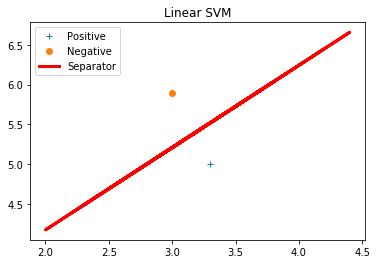

In [42]:
if is_evaluation:
    [[w1], [w2]] = sess.run(W)
    [[b]] = sess.run(bias)
    x_line = [data[1] for data in X]

    # Find the separator line.
    line = []
    line = [-w2/w1*i+b/w1 for i in x_line]

    # coor_pos_list = [positive_X, positive_y]
    # coor_neg_list = [negative_X, negative_y]

    for index, data in enumerate(X):
        if y[index] == 1:
            positive_X = data[1]
            positive_y = data[0]
        elif y[index] == -1:
            negative_X = data[1]
            negative_y = data[0]
        else:
            sys.exit("Invalid label!")
    
    # uncomment if plotting is desired!
    # Plotting the SVM decision boundary.
    plt.plot(positive_X, positive_y, '+', label='Positive')
    plt.plot(negative_X, negative_y, 'o', label='Negative')
    plt.plot(x_line, line, 'r-', label='Separator', linewidth=3)
    plt.legend(loc='best')
    plt.title('Linear SVM')
    plt.show()